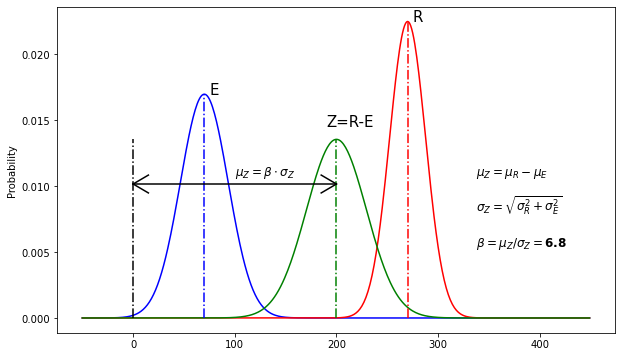

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import matplotlib.lines as lines
  

# define lower and upper values of Effect E and Resistance R
Elower=30
Eupper=111
E = np.arange(Elower,Eupper,1)
Rlower=240
Rupper=301
R = np.arange(Rlower,Rupper,1)

# define safety factors
gamma_m = 1.2
gamma_Q = 1.5


# Plot x-axis range with 1 steps.
x_axis = np.arange(-50, 450, 1)

# figure size in inches
plt.figure(figsize=(10, 6))
  
# Calculating mean and standard deviation
meanE = statistics.mean(E)
sdE = statistics.stdev(E)
probE=(1/(sdE*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdE**2))
probErep=(1/(sdE*math.sqrt(2*math.pi)))*math.exp((-(1.64*sdE)**2)/(2*sdE**2))
# plt.text(Eupper,probE-0.0015, "$\mu_E=$"+'{0:.0f}'.format(meanE), fontsize=10)
# plt.text(Eupper,probE-0.003, "$\sigma_E=$"+'{0:.2f}'.format(sdE), fontsize=10)
# plt.text(Eupper,probE-0.0045, "$\gamma_Q=$"+'{0:.2f}'.format(gamma_Q), fontsize=10)
# Ed = (meanE+1.64*sdE)*gamma_Q

meanR = statistics.mean(R)
sdR = statistics.stdev(R)
probR=(1/(sdR*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdR**2))
probRrep=(1/(sdR*math.sqrt(2*math.pi)))*math.exp((-(1.64*sdR)**2)/(2*sdR**2))
# plt.text(Rupper,probR-0.0015, "$\mu_R=$"+'{0:.0f}'.format(meanR), fontsize=10)
# plt.text(Rupper,probR-0.003, "$\sigma_R=$"+'{0:.2f}'.format(sdR), fontsize=10)
# plt.text(Rupper,probR-0.0045, "$\gamma_m=$"+'{0:.2f}'.format(gamma_m), fontsize=10)
Rd = (meanR-1.64*sdR)/gamma_m

# calculation reliability function
meanZ = meanR-meanE
sdZ=math.sqrt(sdE**2+sdR**2)
probZ=(1/(sdZ*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdZ**2))
beta=meanZ/sdZ

# plot Ed values
# plt.text(Rupper*1.1,0.5*probR-0.0075, "$E_d = E_{char}*\gamma_Q=$"+'{0:.0f}'.format(Ed), fontsize=10)
# plt.text(Rupper*1.1,0.5*probR-0.0090, "$R_d = R_{char}/\gamma_m=$"+'{0:.0f}'.format(Rd), fontsize=10)
# plt.text(Rupper*1.1,0.5*probR-0.0105, "u.c. = $E_d / R_d = $"+'{0:.2f}'.format(Ed/Rd), fontsize=10)

# plot normal distribution curves for E (blue) and R (red)
plt.plot(x_axis, norm.pdf(x_axis, meanE, sdE),'b')
plt.plot(x_axis, norm.pdf(x_axis, meanR, sdR), 'r')
plt.plot(x_axis, norm.pdf(x_axis, meanZ, sdZ), 'g')

plt.text(meanE+5, probE, 'E', fontsize=15)
# plt.text(meanE+1.64*sdE, probErep, "$E_{char}=$"+'{0:.0f}'.format(meanE+1.64*sdE), fontsize=10)
# plt.text(meanE+2.8*sdE*gamma_Q, probErep*0.7, '$E_d$', fontsize=10)

# plot averages with dash-dotted red/blue lines
plt.plot([meanR,meanR],[0,probR], 'r-.')
plt.plot([meanE,meanE],[0,probE], 'b-.')
plt.plot([meanZ,meanZ],[0,probZ], 'g-.')

# plot 5%-characteristic value with dashed red/blue lines
# plt.plot([meanR-1.64*sdR,meanR-1.64*sdR],[0,probRrep], 'r--')
# plt.plot([meanE+1.64*sdE,meanE+1.64*sdE],[0,probErep], 'b--')

# plot dimensioning value with drawn red/blue lined
# plt.plot([(meanR-1.64*sdR)/gamma_m,(meanR-1.64*sdR)/gamma_m],[0,0.7*probErep], 'r-')
# plt.plot([(meanE+1.64*sdE)*gamma_Q,(meanE+1.64*sdE)*gamma_Q],[0,0.7*probErep], 'b-')

plt.text(meanR+5, probR, 'R', fontsize=15)
# plt.text(meanR-3.7*sdR, probRrep, "$R_{char}=$"+'{0:.0f}'.format(meanR-1.64*sdR), fontsize=10)
# plt.text(meanR-4.5*sdR/gamma_m, probErep*0.7, '$R_{d}$', fontsize=10)

plt.text(meanZ-10, probZ+0.001, 'Z=R-E', fontsize=15)

# arrows for beta
plt.plot([0,0],[0,probZ], 'k-.')
plt.plot([0,meanZ],[0.75*probZ,0.75*probZ], 'k-')
plt.plot([0,15],[0.75*probZ,0.80*probZ], 'k-')
plt.plot([0,15],[0.75*probZ,0.70*probZ], 'k-')
plt.plot([meanZ,meanZ-15],[0.75*probZ,0.80*probZ], 'k-')
plt.plot([meanZ,meanZ-15],[0.75*probZ,0.70*probZ], 'k-')
plt.text(meanZ/2, 0.8*probZ, "$\\mu_Z = \\beta \\cdot \\sigma_Z $", fontsize=12)
plt.text(meanR*1.25, 0.8*probZ, "$\\mu_Z = \\mu_R - \mu_E $", fontsize=12)
plt.text(meanR*1.25, 0.60*probZ, "$\\sigma_Z = \sqrt{\sigma_R^2 + \sigma_E^2} $", fontsize=12)
# plt.text(Rupper,probR-0.0045, "$\gamma_m=$"+'{0:.2f}'.format(gamma_m), fontsize=10)
plt.text(meanR*1.25, 0.40*probZ, "$\\beta = \\mu_Z / \\sigma_Z = $"+'{0:.1f}'.format(beta), fontsize=12, fontweight='bold')

# plt.xlabel("Effect (E, left) vs. Resistance (R, right) [unit could be e.g. load in kN or stress in MPa]")
plt.ylabel("Probability")
# plt.xticks([])
# plt.yticks([])
# frame1 = plt.gca()
# frame1.axes.xaxis.set_ticklabels([])
# frame1.axes.yaxis.set_ticklabels([])
plt.savefig("Z_curve_highgamma_uc0.81_beta6.8.pdf", format="pdf", bbox_inches="tight")
plt.show()

# heading

Some text to explain the above script.